<a href="https://colab.research.google.com/github/yashsakhuja/Pandas-vs-Polars-A-Data-Workflow-Showdown/blob/main/Pandas%20vs%20Polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⎀ Importing Packages

In [ ]:
#Importing the packages
import polars as pl
import pandas as pd

In [ ]:
print("Pandas: "+pd.__version__)
print("Polars: "+pl.__version__)

Pandas: 2.1.4
Polars: 0.20.2


# 📖 Reading CSVs

In [ ]:
sales_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/sales.csv")

In [ ]:
sales_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/sales.csv")

In [ ]:
##Reading other data- pandas
inv_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/inventory.csv")
prod_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/products.csv")
stores_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/stores.csv")

In [ ]:
##Reading other data- polars
inv_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/inventory.csv")
prod_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/products.csv")
stores_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/stores.csv")

In [ ]:
%%timeit -r10 -n10
#pandas
sales_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/sales.csv")
inv_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/inventory.csv")
prod_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/products.csv")
stores_pd = pd.read_csv("/content/drive/MyDrive/Maven Toys Data/stores.csv")

461 ms ± 78.2 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
#polars
sales_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/sales.csv")
inv_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/inventory.csv")
prod_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/products.csv")
stores_pl = pl.read_csv("/content/drive/MyDrive/Maven Toys Data/stores.csv")

208 ms ± 56.1 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


# 👀 Viewing Data

In [ ]:
print(sales_pl)

shape: (829_262, 5)
┌─────────┬────────────┬──────────┬────────────┬───────┐
│ Sale_ID ┆ Date       ┆ Store_ID ┆ Product_ID ┆ Units │
│ ---     ┆ ---        ┆ ---      ┆ ---        ┆ ---   │
│ i64     ┆ str        ┆ i64      ┆ i64        ┆ i64   │
╞═════════╪════════════╪══════════╪════════════╪═══════╡
│ 1       ┆ 2022-01-01 ┆ 24       ┆ 4          ┆ 1     │
│ 2       ┆ 2022-01-01 ┆ 28       ┆ 1          ┆ 1     │
│ 3       ┆ 2022-01-01 ┆ 6        ┆ 8          ┆ 1     │
│ 4       ┆ 2022-01-01 ┆ 48       ┆ 7          ┆ 1     │
│ …       ┆ …          ┆ …        ┆ …          ┆ …     │
│ 829259  ┆ 2023-09-30 ┆ 16       ┆ 35         ┆ 1     │
│ 829260  ┆ 2023-09-30 ┆ 22       ┆ 19         ┆ 1     │
│ 829261  ┆ 2023-09-30 ┆ 13       ┆ 2          ┆ 2     │
│ 829262  ┆ 2023-09-30 ┆ 32       ┆ 6          ┆ 1     │
└─────────┴────────────┴──────────┴────────────┴───────┘


In [ ]:
print(sales_pd)

        Sale_ID        Date  Store_ID  Product_ID  Units
0             1  2022-01-01        24           4      1
1             2  2022-01-01        28           1      1
2             3  2022-01-01         6           8      1
3             4  2022-01-01        48           7      1
4             5  2022-01-01        44          18      1
...         ...         ...       ...         ...    ...
829257   829258  2023-09-30        24          19      1
829258   829259  2023-09-30        16          35      1
829259   829260  2023-09-30        22          19      1
829260   829261  2023-09-30        13           2      2
829261   829262  2023-09-30        32           6      1

[829262 rows x 5 columns]


# 🤝 Joining Data

In [ ]:
final_pd = sales_pd.merge(prod_pd, on='Product_ID', how='left')\
                   .merge(stores_pd, on='Store_ID', how='left')\
                   .merge(inv_pd, on=['Store_ID', 'Product_ID'], how='left')

In [ ]:
final_pd.shape

(829262, 14)

In [ ]:
final_pl = sales_pl.join(prod_pl, on='Product_ID', how='left') \
                   .join(stores_pl, on='Store_ID', how='left') \
                   .join(inv_pl, on=['Store_ID', 'Product_ID'], how='left')

In [ ]:
final_pd.shape

(829262, 14)

In [ ]:
%%timeit -r10 -n10
final_pd = sales_pd.merge(prod_pd, on='Product_ID', how='left')\
                   .merge(stores_pd, on='Store_ID', how='left')\
                   .merge(inv_pd, on=['Store_ID', 'Product_ID'], how='left')

684 ms ± 50.4 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
final_pl = sales_pl.join(prod_pl, on='Product_ID', how='left') \
                   .join(stores_pl, on='Store_ID', how='left') \
                   .join(inv_pl, on=['Store_ID', 'Product_ID'], how='left')

290 ms ± 48.7 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
final_pl.head()

Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand
i64,str,i64,i64,i64,str,str,str,str,str,str,str,str,i64
1,"""2022-01-01""",24,4,1,"""Chutes & Ladde…","""Games""","""$9.99 ""","""$12.99 ""","""Maven Toys Agu…","""Aguascalientes…","""Downtown""","""2010-07-31""",1
2,"""2022-01-01""",28,1,1,"""Action Figure""","""Toys""","""$9.99 ""","""$15.99 ""","""Maven Toys Pue…","""Puebla""","""Downtown""","""2011-04-01""",6
3,"""2022-01-01""",6,8,1,"""Deck Of Cards""","""Games""","""$3.99 ""","""$6.99 ""","""Maven Toys Mex…","""Mexicali""","""Commercial""","""2003-12-13""",50
4,"""2022-01-01""",48,7,1,"""Dart Gun""","""Sports & Outdo…","""$11.99 ""","""$15.99 ""","""Maven Toys Sal…","""Saltillo""","""Commercial""","""2016-03-23""",28
5,"""2022-01-01""",44,18,1,"""Lego Bricks""","""Toys""","""$34.99 ""","""$39.99 ""","""Maven Toys Pue…","""Puebla""","""Residential""","""2014-12-27""",117


# ✍🏼 Writing Data

In [ ]:
%%timeit -r10 -n10
#pandas
final_pd.to_csv('output_file_pd.csv', index=False)

5.97 s ± 142 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
#polars
final_pl.write_csv('output_file.csv')

1.52 s ± 50.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


# 👉 Selecting Data Columns
Selecting 10 out of 14 columns

In [ ]:
%%timeit -r 10 -n 10
#pandas
pd_df_selected = final_pd[['Sale_ID', 'Date','Store_City','Store_Location','Store_Name', 'Product_Category', 'Product_Name', 'Product_Cost','Product_Price','Units']]

49.9 ms ± 1.43 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r 10 -n 10
#pandas
pl_df_selected = final_pl[['Sale_ID', 'Date','Store_City','Store_Location','Store_Name', 'Product_Category', 'Product_Name', 'Product_Cost','Product_Price','Units']]

13.8 µs ± 5.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
#pandas
pd_df_selected = final_pd[['Sale_ID', 'Date','Store_City','Store_Location','Store_Name', 'Product_Category', 'Product_Name', 'Product_Cost','Product_Price','Units']]

#polars
pl_df_selected = final_pl[['Sale_ID', 'Date','Store_City','Store_Location','Store_Name', 'Product_Category', 'Product_Name', 'Product_Cost','Product_Price','Units']]

# ⎖ Filtering Data


*   filtering 90,725 rows out of 829,262 rows (11% rows)
*   Filtering sales from Store City= "Cuidad de Mexico"




In [ ]:
#Filtering the rows from Store City= "Cuidad de Mexico"
#pandas
filter_pd_df = pd_df_selected[pd_df_selected['Store_City']=='Cuidad de Mexico']

#polars
filter_pl_df = pl_df_selected.filter(pl.col('Store_City') == "Cuidad de Mexico")

In [ ]:
%%timeit -r10 -n10
#Filtering the rows from Store City= "Cuidad de Mexico"
#pandas
filter_pd_df = pd_df_selected[pd_df_selected['Store_City']=='Cuidad de Mexico']

80.1 ms ± 19.5 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
#Filtering the rows from Store City= "Cuidad de Mexico"
#polars
filter_pl_df = pl_df_selected.filter(pl.col('Store_City') == "Cuidad de Mexico")

41.9 ms ± 1.66 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


# 🏘️ Grouping and Aggregation
Total Distinct orders grouped by 5 Product Categories

In [ ]:
group_pd_df=pd_df_selected.groupby('Product_Category')['Sale_ID'].nunique().reset_index(name='Total Transactions')
group_pd_df

,Product_Category,Total Transactions
0,Art & Crafts,220673
1,Electronics,99025
2,Games,157006
3,Sports & Outdoors,131331
4,Toys,221227


In [ ]:
group_pl_df=pl_df_selected.group_by('Product_Category').agg(pl.col('Sale_ID').n_unique().alias('Total Transactions'))
group_pl_df

Product_Category,Total Transactions
str,u32
"""Games""",157006
"""Art & Crafts""",220673
"""Sports & Outdo…",131331
"""Electronics""",99025
"""Toys""",221227


In [ ]:
%%timeit -r10 -n10
#pandas
group_pd_df=pd_df_selected.groupby('Product_Category')['Sale_ID'].nunique().reset_index(name='Total Transactions')
group_pd_df

170 ms ± 33.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
#polars
group_pl_df=pl_df_selected.group_by('Product_Category').agg(pl.col('Sale_ID').n_unique().alias('Total Transactions'))
group_pl_df

46.2 ms ± 1.06 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


# 🔤 Changing Data Types

In [ ]:
#Removing Dollar Sign
final_pd['Product_Price'] = final_pd['Product_Price'].replace('[\$,]', ' ', regex=True)

final_pl = (final_pl.with_columns(pl.col('Product_Price').str.replace_all(r'\$', ' ').str.strip()))

<ipython-input-194-18c0fb53d21e>:4: DeprecationWarning: `strip` is deprecated. It has been renamed to `strip_chars`.
  final_pl = (final_pl.with_columns(pl.col('Product_Price').str.replace_all(r'\$', ' ').str.strip()))


In [ ]:
#Changing the data type from object to float- pandas
final_pd['Product_Price'] = final_pd['Product_Price'].astype(float)

In [ ]:
#Changing the data type from object to float- polars
final_pl = final_pl.with_columns(pl.col('Product_Price').cast(pl.Float64))

In [ ]:
%%timeit -r10 -n10
#pandas
final_pd['Product_Price'].astype(float)

1.48 ms ± 124 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
#polars
final_pl.with_columns(pl.col('Product_Price').cast(pl.Float64))

46.1 µs ± 12.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


# ⬇️ Sorting Data
Sorting in Descending Order by Prices

In [ ]:
#pandas
sorted_pd_df = final_pd.sort_values(by='Product_Price', ascending=False)

#polars
sorted_pl_df = final_pl.sort("Product_Price", descending=True)

In [ ]:
%%timeit -r10 -n10
#pandas
final_pd.sort_values(by='Product_Price', ascending=True)

317 ms ± 53.9 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
%%timeit -r10 -n10
#polars
final_pl.sort("Product_Price", descending=False)

388 ms ± 57.1 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


# 🐻‍❄️ Eager vs Lazy API

## Eager API with read_csv

In [ ]:
%%timeit -r10 -n10
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("output_file_pl.csv")

# Filter the DataFrame
filtered_df = df[df['Store_City'] == "Cuidad de Mexico"]

# Group by 'Product_Category' and count 'Sale_ID's
grouped_df = (filtered_df
               .groupby('Product_Category')
               .agg(Total_Transactions=('Sale_ID', 'count'))
               .reset_index())

# Sort by the count of transactions in descending order
sorted_df = grouped_df.sort_values(by='Total_Transactions', ascending=False)

1.99 s ± 52.5 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
# Using read_csv (eager API)
eager_pl_df = (
    pl.read_csv("output_file_pl.csv")
    .filter(pl.col('Store_City') == "Cuidad de Mexico")
    .group_by('Product_Category')
    .agg(pl.col('Sale_ID').count().alias("Total Transactions"))
    .sort("Total Transactions", descending=True)
)

In [ ]:
%%timeit -r10 -n10
# Using read_csv (eager API)
eager_pl_df = (
    pl.read_csv("output_file_pl.csv")
    .filter(pl.col('Store_City') == "Cuidad de Mexico")
    .group_by('Product_Category')
    .agg(pl.col('Sale_ID').count().alias("Total Transactions"))
    .sort("Total Transactions", descending=True)
)

830 ms ± 108 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
eager_pl_df

Product_Category,Total Transactions
str,u32
"""Toys""",24556
"""Art & Crafts""",22560
"""Games""",18116
"""Sports & Outdo…",15458
"""Electronics""",10035


## Lazy API with scan_csv

In [ ]:
# Using scan_csv (lazy API)
lazy_pl_df = (
    pl.scan_csv("output_file_pl.csv")
    .filter(pl.col('Store_City') == "Cuidad de Mexico")
    .group_by('Product_Category')
    .agg(pl.col('Sale_ID').count().alias("Total Transactions"))
    .sort("Total Transactions", descending=True)
    .collect()
)

In [ ]:
lazy_pl_df

Product_Category,Total Transactions
str,u32
"""Toys""",24556
"""Art & Crafts""",22560
"""Games""",18116
"""Sports & Outdo…",15458
"""Electronics""",10035


In [ ]:
%%timeit -r10 -n10
# Using scan_csv (lazy API)
lazy_pl_df = (
    pl.scan_csv("output_file_pl.csv")
    .filter(pl.col('Store_City') == "Cuidad de Mexico")
    .group_by('Product_Category')
    .agg(pl.col('Sale_ID').count().alias("Total Transactions"))
    .sort("Total Transactions", descending=True)
    .collect()
)

236 ms ± 62.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


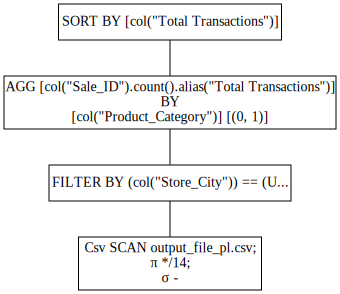

In [ ]:
plan = (
    pl.scan_csv("output_file_pl.csv")
    .filter(pl.col('Store_City') == "Cuidad de Mexico")
    .group_by('Product_Category')
    .agg(pl.col('Sale_ID').count().alias("Total Transactions"))
    .sort("Total Transactions", descending=True)
)

plan.show_graph(optimized=False)

# Comparison